<a href="https://colab.research.google.com/github/jssaini7815/Basic-Python/blob/main/DigitRecognition_train_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
#Import the necessary libraries and modules
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
# Dense layer is the regular deeply connected neural network layer. 
# It is most common and frequently used layer. 
# Dense layer does the below operation on the input and return the output.
# Dropout layer randomly sets input units to 0 with a 
# frequency of rate at each step during training time,
# which helps prevent overfitting.
# Keras - Flatten Layers. Flatten is used to flatten the input. 
# For example, if flatten is applied 
# to layer having input shape as (batch_size, 2,2), 
# then the output shape of the layer will be (batch_size, 4)
# Flatten has one argument as follows.

# Reshape Layers:This layer has the responsibility of changing the shape of the input.
from keras.layers import Conv2D,MaxPooling2D
# Introducing max pooling Max pooling is a type of operation that is 
# typically added to CNNs following individual convolutional layers.
# When added to a model, max pooling reduces the dimensionality of images by reducing
# the number of pixels in the output from the previous convolutional layer.
# The pooling layer is used for applying max pooling operations 
# on temporal data
#Conv2D:
# 2D convolution layer (e.g. spatial convolution over images). This layer creates a convolution kernel 
# that is convolved with the layer input to produce a tensor of outputs.
# two conv layers side by side, each seeing half the input channels, and producing half the output channels, 
# and both subsequently concatenated.
from keras import backend as K
# By default, keras uses TensorFlow backend. If you want to change backend configuration from TensorFlow to Theano,
# just change the backend = theano in keras.json file

Splitting the MNIST dataset into Train and Test

In [95]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Preporcessing the input data

In [61]:
# num_of_trainImgs=x_train.shape[0]#60000 here
# num_of_testImgs=x_test.shape[0]#10000 here
# img_width=28
# img_height=28
# x_train=x_train.reshape(x_train.shape[0],img_height,img_width,1)
# x_test = x_test.reshape(x_test.shape[0], img_height, img_width, 1)

# input_shape = (img_height, img_width, 1)
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

In [96]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [97]:
#Take a look at the first image at index=0 in the training data set
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [98]:
y_train[0]

5

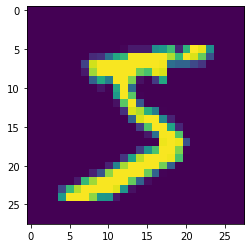

In [99]:
#show the image as a picture
plt.imshow(x_train[0])

In [100]:
#Reshape the data to fit the model
x_train=x_train.reshape(60000,28,28,1) # 1 means grayscale
x_test=x_test.reshape(10000,28,28,1)

In [101]:
#one-Hot Encoding:
# y_train_one_hot= to_categorical(y_train)
# y_test_one_hot=to_categorical(y_test)

# #print the new label
# print(y_train_one_hot[0])

Converting the class vectors to binary class

In [102]:

y_train_one_hot=keras.utils.to_categorical(y_train)
y_test_one_hot=keras.utils.to_categorical(y_test)

In [103]:
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [104]:
#Build the CNN model
model=Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

Defining the model architecture

In [63]:
# model =Sequential()
# model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes,activation='softmax'))

#Compiling the model

In [105]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

In [56]:
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

Fitting the model on trainin data

In [106]:
#Train the model
hist=model.fit(x_train,y_train_one_hot,batch_size=128,epochs=30,verbose=1,validation_data=(x_test,y_test_one_hot))

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 1.9095 - accuracy: 0.8677 - val_loss: 0.0821 - val_accuracy: 0.9740
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0580 - accuracy: 0.9816 - val_loss: 0.0786 - val_accuracy: 0.9755
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.0780 - val_accuracy: 0.9774
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0978 - val_accuracy: 0.9754
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0925 - val_accuracy: 0.9790
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0221 - accuracy: 0.9924 - val_loss: 0.1107 - val_accuracy: 0.9767
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.1061 - val_accuracy: 0.9788
Epoch 

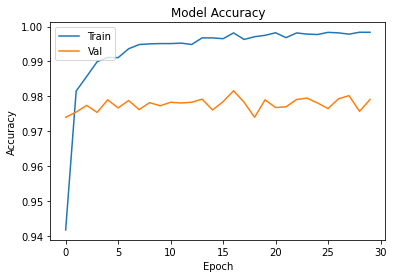

In [108]:
#Visualize the models accuracy
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')

In [110]:
#show predictioons as probabilities fo rthe first 4 images in the test set
predictions=model.predict(x_test[:4])
predictions

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [111]:
#print our predictions as number labels for the first 4 images
print(np.argmax(predictions,axis=1))
#print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


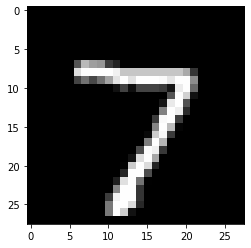

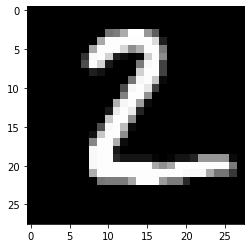

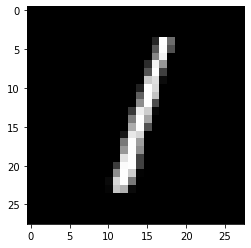

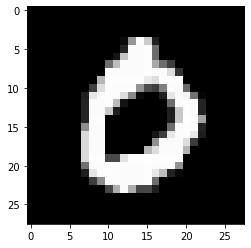

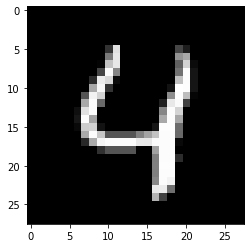

In [115]:
#show the first 4 images a pictures
for i in range(0,5):
  image=x_test[i]
  image=np.array(image,dtype='float')
  pixels=image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()

Evaluating the model on test data

In [66]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.036519039422273636
Test accuracy: 0.9926000237464905


In [68]:
# predictions=model.predict(x_test)
# import numpy as np
# np.set_printoptions(suppress=True)
# print(y_test[0])
# print(predictions[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


<!--  -->
#Saving the Model

In [15]:
model.save('trained_model.h5')

In [17]:
!pip install h5py pyyaml

#Digit Recognition 


In [20]:
#Importing the necessary libraries
import numpy as np
import cv2
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from keras.models import load_model

In [119]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [39]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [41]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [130]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


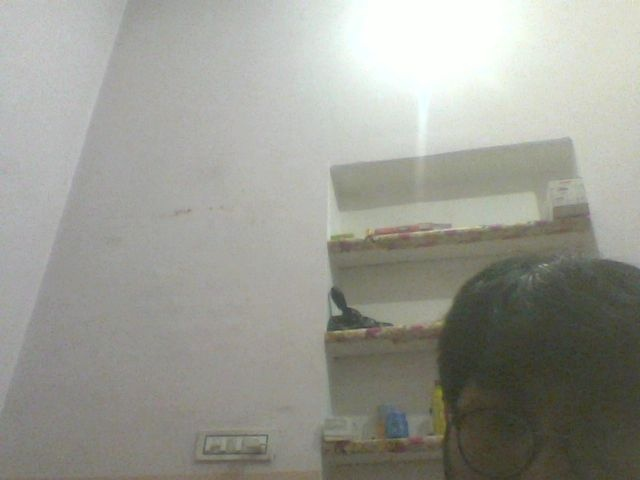

In [131]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [127]:
x=display(take_photo)
x

<function __main__.take_photo>

In [35]:
#Loading our pretrained model
model=keras.models.load_model('trained_model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [30]:
#Loading our pretrained model
model

In [36]:
#Reading the Image
img_orig=cap.read()

In [ ]:
#Converting the image to grayscale
img_gray=rgb2gray(img_orig)